In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def data_to_variables():
    with open('data_storage.txt','r') as doc:
        index_path = []
        uvw_xy, kalpha_theta, counts, start_step_end, counts_bac,name = [], [], [], [], [],[]  

        lines = doc.readlines()
        for i,line in enumerate(lines):
            if '[PATH]' in line:
                index_path.append(i)
        for n in range(10):
            nr_line = index_path[n+10]
            if '[NO FILE]' in lines[nr_line+3]:
                continue
            name.append(lines[nr_line+1].replace('[','').replace(']','').replace(',','').strip().split())
            uvw_xy.append(lines[nr_line+2].replace('[','').replace(']','').replace(',','').strip().split())
            kalpha_theta.append(lines[nr_line+3].replace('[','').replace(']','').replace(',','').strip().split())
            counts.append(lines[nr_line+4].replace('[','').replace(']','').replace(',','').strip().split())
            start_step_end.append(lines[nr_line+5].replace('[','').replace(']','').replace(',','').strip().split())
            counts_bac.append(lines[nr_line+6].replace('[','').replace(']','').replace(',','').strip().split())

        for i in range(len(uvw_xy)):
            for j in range(len(uvw_xy[i])):
                uvw_xy[i][j] = float(uvw_xy[i][j])

        for i in range(len(kalpha_theta )):
            for j in range(len(kalpha_theta[i])):
                kalpha_theta[i][j] = float(kalpha_theta[i][j])

        for i in range(len(counts )):
            for j in range(len(counts[i])):
                counts[i][j] = int(counts[i][j])

        for i in range(len(start_step_end )):
            for j in range(len(start_step_end[i])):
                start_step_end[i][j] = float(start_step_end[i][j])

        for i in range(len(counts_bac )):
            for j in range(len(counts_bac[i])):
                counts_bac[i][j] = int(counts_bac[i][j])
        print(name)
        print(uvw_xy)
        print(kalpha_theta)
        print(counts)
        print(start_step_end)
        print(counts_bac)
    return uvw_xy,kalpha_theta,counts,start_step_end,counts_bac,name
            

In [236]:
uvw_xy,kalpha_theta,counts,start_step_end,counts_bac,name = data_to_variables()

[['WO3_600RPM_10min'], ['wo3_600rpm_120min'], ['WO3_600RPM_20min'], ['WO3_raw'], ['ZrO2_800RPM_005min'], ['ZrO2_800RPM_120min'], ['ZrO2_raw'], ['NaCl+KCl_12min_800rpm'], ['NaCl+KCl_9min_800rpm']]
[[0.004391, -0.000389, 0.009813, 0.387061, 8.2e-05, 4e-05, 0.0, 0.0], [0.004391, -0.000389, 0.009813, 1.376032, 0.0001, 4e-05, 0.0, 0.0], [0.004391, -0.000389, 0.009813, 1.67208, 1.6e-05, 4e-05, 0.0, 0.0], [0.004391, -0.000389, 0.009813, 0.256391, 0.006613, 4e-05, 0.0, 0.0], [0.004391, -0.000389, 0.009813, 0.153834, 0.092947, 4e-05, 0.0, 0.0], [0.004391, -0.000389, 0.009813, 0.330619, 0.430739, 4e-05, 0.0, 0.0], [0.004391, -0.000389, 0.009813, 0.153998, 0.092994, 4e-05, 0.0, 0.0], [0.002788, 0.00107, 0.003481, 0.357445, 6.1e-05, 0.0, 0.0, 0.0], [0.002788, 0.00107, 0.003481, 0.240287, 0.019488, 0.0, 0.0, 0.0]]
[[1.540598, 1.544426, 15.01651127, 114.98332229], [1.540598, 1.544426, 15.01651127, 114.98332229], [1.540598, 1.544426, 15.01651127, 114.98332229], [1.540598, 1.544426, 15.01651127, 114.9

#  tutaj coś jakby trzeba dopracować bo biorę tylko początkowy kąt, a co z końcowym ? -->>

In [237]:
def gaussian_lorenzian(uvw_xy,kalpha_theta):
    u = uvw_xy[0] 
    v = uvw_xy[1]
    w = uvw_xy[2]
    x = uvw_xy[3]
    y = uvw_xy[4]
    theta = kalpha_theta[2]/2 #  tutaj coś jakby trzeba dopracować bo biorę tylko początkowy kąt, a co z końcowym ? 
    fwhm2_gauss = u*math.tan(theta)**2+v*math.tan(theta)+w
    fwhm_lorenz = x*math.tan(theta)+(y/(math.cos(theta)))
    print(fwhm2_gauss)
    print(fwhm_lorenz)
    

In [238]:
def plot_sample__bac(counts,start_step_end,counts_bac,name):
    start=start_step_end[0]
    step=start_step_end[1]
    end=start_step_end[2]
    N = int((end - start)/step)+2
    x_bac = np.linspace(start, end,N)

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(counts)), counts, label="Counts (sample)", color="blue")
    plt.xlabel("2Theta")
    plt.ylabel("Counts")
    plt.title(f"Sample of {name} ")
    plt.grid(True)
    plt.legend()
    
    plt.plot(range(len(counts_bac)), counts_bac, label="Counts (background)", color="orange")
    plt.xlabel("2θ [deg]")
    plt.ylabel("Intensity")
    plt.grid(True)
    plt.legend()
    plt.show()


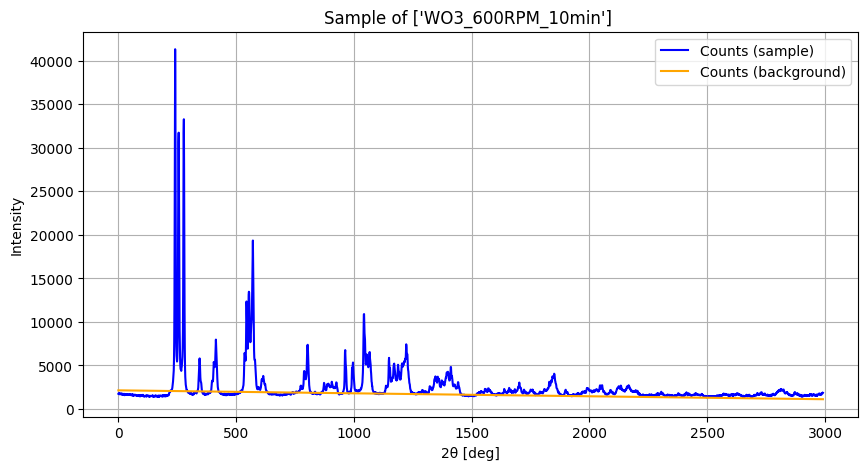

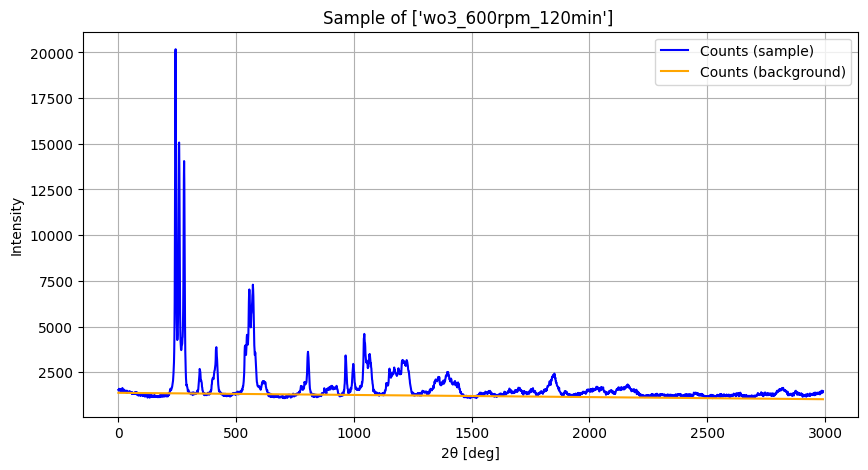

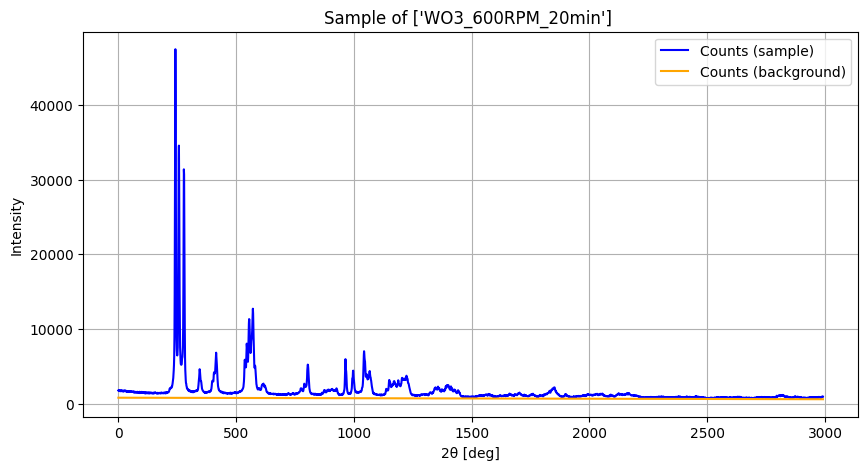

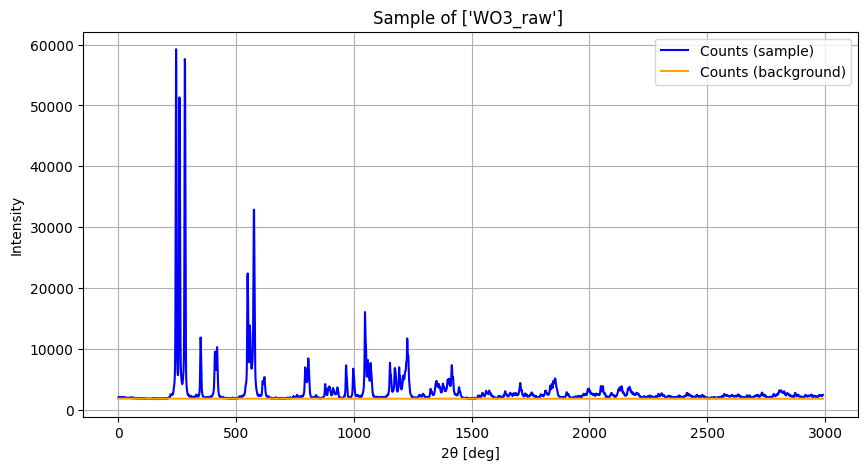

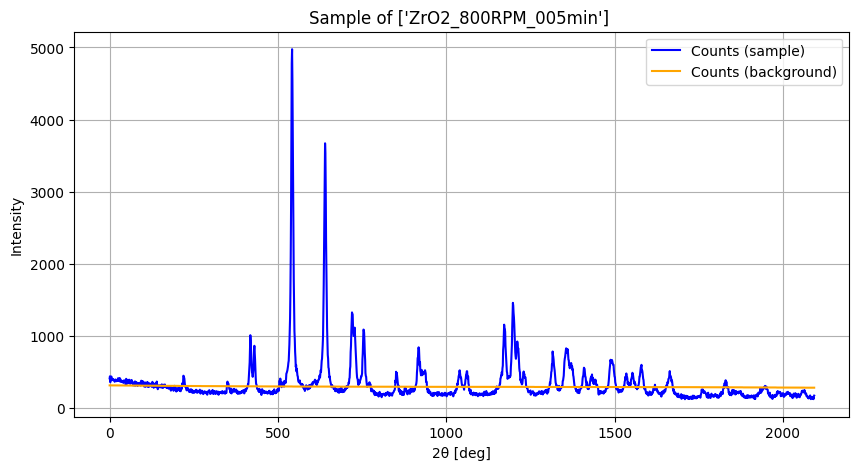

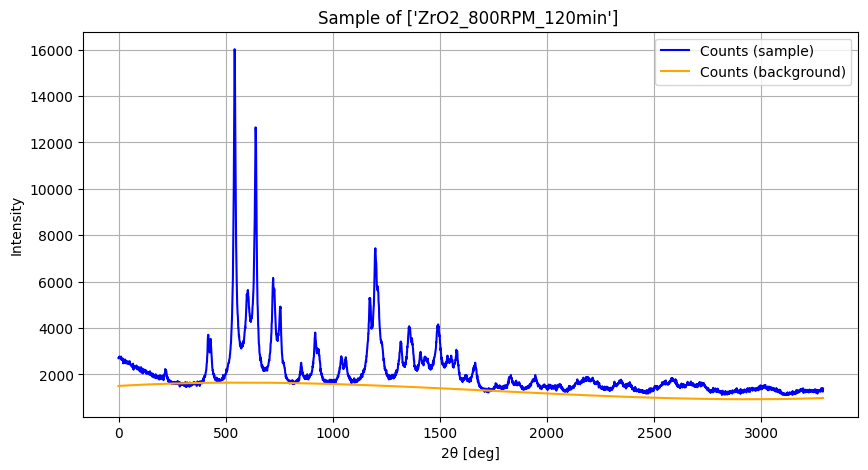

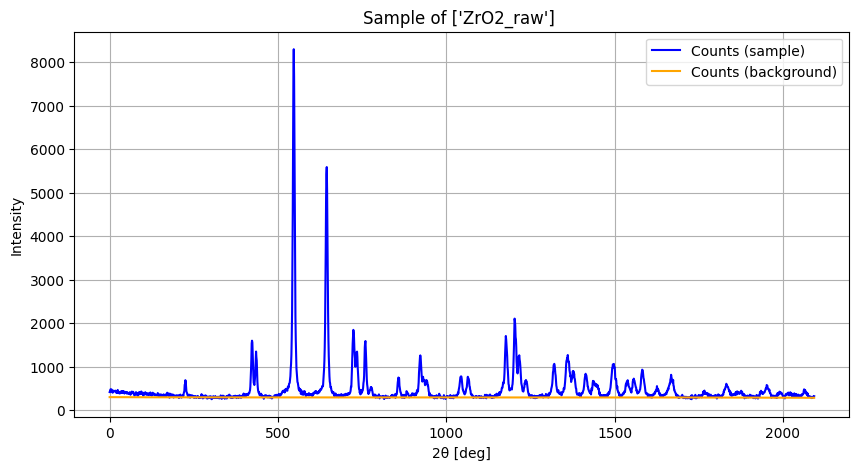

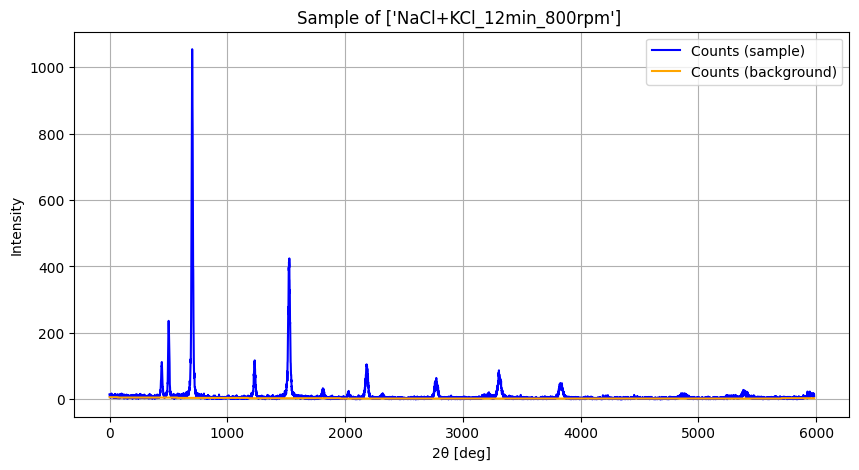

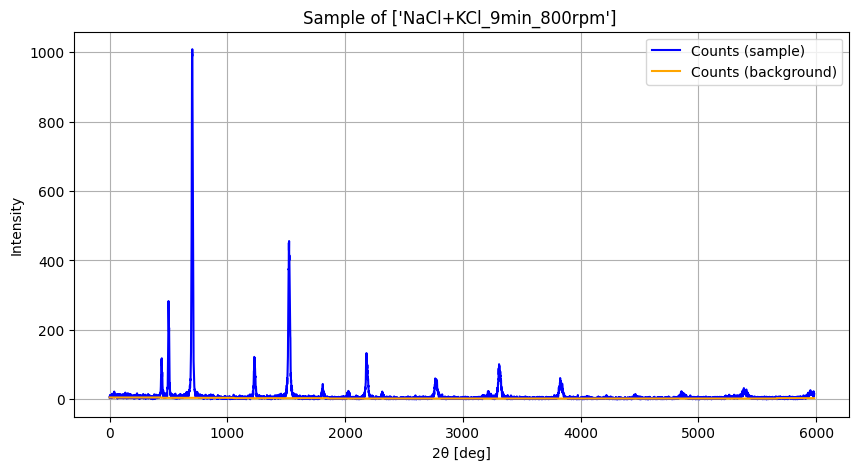

In [239]:
# a = 0
# gaussian_lorenzian(uvw_xy[a][:],kalpha_theta[a][:])
for a in range(len(name)):
    plot_sample__bac(counts[a][:],start_step_end[a][:],counts_bac[a][:],name[a][:])
# print(uvw_xy[a][:])
# print(kalpha_theta[a][:])